In [ ]:
# Test here F1 score

In [4]:
import numpy as np
import collections
from sklearn.metrics import f1_score
import sys
sys.path.append('/home/evgenia/tools/v2/Arctic-midlat/Python_scripts/functions')
from collections import defaultdict #
from calculations import get_metric_f1 as f1
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

masking_list = [ 'DJF', 'OND', 'JFM']
pc_element = 0.01
#associated with f1-score alpha
alpha = 0.01
#sns.set(style="darkgrid")
base_scen = '/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/scenario/dicts_from_PCMCIplus/13072022/'
base_folder = '/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/dicts_from_PCMCIplus/14072022/'

In [5]:
dictionary = np.load(base_folder + "1causal_links_historical_10actors_for_f1.npy",allow_pickle='TRUE').item()
dictionary_scenario = np.load(base_scen + "1causal_links_historical_10actors_for_f1_scenario.npy",allow_pickle='TRUE').item()

In [6]:
df_f1score= {}
f1_dict = {}
score_list =[]
for masking in masking_list: 
    f1_dict.setdefault (masking, {})
    for key in dictionary:
        if key != 'OBS':
            ref_p_matrix= dictionary['OBS'][masking][pc_element]['results']['p_matrix']
            p_matrix= dictionary[key][masking][pc_element]['results']['p_matrix']
            ref_val_matrix= dictionary['OBS'][masking][pc_element]['results']['val_matrix']
            val_matrix= dictionary[key][masking][pc_element]['results']['val_matrix']
            precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                        tau_min=0, tau_diff=2, same_sign=True)
            f1_dict[masking].setdefault(key, score)

In [7]:
f1_dict_scenario = {}
for masking in masking_list: 
    f1_dict_scenario.setdefault (masking, {})
    
    for key in dictionary_scenario:
        # for each future simulations set a reference of historical simulation
        ref_p_matrix= dictionary[key][masking][pc_element]['results']['p_matrix']
        ref_val_matrix= dictionary[key][masking][pc_element]['results']['val_matrix']  
        # calculate f1-score
        p_matrix= dictionary_scenario[key][masking][pc_element]['results']['p_matrix']
        val_matrix= dictionary_scenario[key][masking][pc_element]['results']['val_matrix']
        precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                    tau_min=0, tau_diff=0, same_sign=True)
        f1_dict_scenario[masking].setdefault(key, score)

/tmp/ipykernel_15119/1503767159.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(labels =f1_dict['DJF'].keys (), rotation="30" ,horizontalalignment= "right")


Text(0.2, 0.83, '(c)')

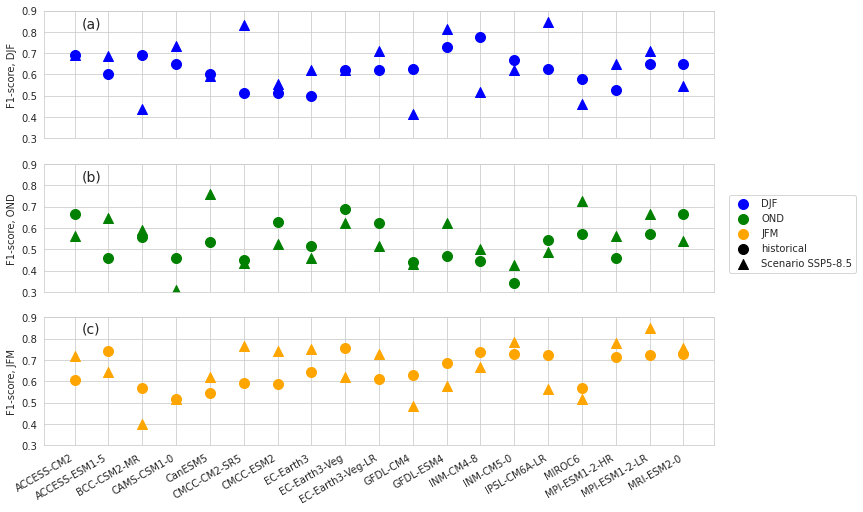

In [8]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(12,8))

a = axs[0].scatter(f1_dict['DJF'].keys(), f1_dict['DJF'].values(),  s=100, label = 'DJF', color = 'blue')
axs[0].scatter(f1_dict_scenario['DJF'].keys(), f1_dict_scenario['DJF'].values(),  s=100, label = 'DJF', color = 'blue', marker = "^")
axs[0].set_ylim (0.3, 0.9)
axs[0].set_ylabel ('F1-score, DJF')
plt.yticks(np.arange(0.3, 1, 0.1))

b = axs[1].scatter(f1_dict['OND'].keys(), f1_dict['OND'].values(),  s=100, label = 'OND', color = 'green')
axs[1].scatter(f1_dict_scenario['OND'].keys(), f1_dict_scenario['OND'].values(),  s=100, label = 'OND', color = 'green', marker = "^")
axs[1].set_ylabel ('F1-score, OND')

c = axs[2].scatter(f1_dict['JFM'].keys(), f1_dict['JFM'].values(),  s=100, label = 'JFM', color = 'orange')
axs[2].scatter(f1_dict_scenario['JFM'].keys(), f1_dict_scenario['JFM'].values(),  s=100, label = 'JFM', color = 'orange', marker = "^")
axs[2].set_ylabel ('F1-score, JFM')
axs[2].set_xticklabels(labels =f1_dict['DJF'].keys (), rotation="30" ,horizontalalignment= "right")
d = axs[0].scatter (0,0, s= 100, color = 'k',)
e = axs[0].scatter (0,0, s= 100, color = 'k', marker = "^")
plt.legend([ a, b, c, d, e], [  'DJF','OND', 'JFM', "historical", "Scenario SSP5-8.5" ] , bbox_to_anchor =(1.22, 2.))

plt.text(0.2,2.26 ,'(a)', fontsize = 14)
plt.text(0.2,1.54 ,'(b)', fontsize = 14)
plt.text(0.2,0.83 ,'(c)', fontsize = 14)
#plt.savefig ('/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/f1_score/historical_vs_scenario_f1.png', dpi =120, bbox_inches = 'tight')

In [ ]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(12,8))
#plt.legend(['Historical', 'Scenario SSP5.85'])

a = axs[0].scatter(f1_dict['DJF'].keys(), f1_dict['DJF'].values(),  s=100, label = 'DJF', color = 'blue')
axs[0].scatter(f1_dict_scenario['DJF'].keys(), f1_dict_scenario['DJF'].values(),  s=100, label = 'DJF', color = 'blue', marker = "^")
axs[0].set_ylim (0.3, 0.9)
axs[0].set_ylabel ('F1-score, DJF')
plt.yticks(np.arange(0.3, 1, 0.1))

b = axs[1].scatter(f1_dict['OND'].keys(), f1_dict['OND'].values(),  s=100, label = 'OND', color = 'green')
axs[1].scatter(f1_dict_scenario['OND'].keys(), f1_dict_scenario['OND'].values(),  s=100, label = 'OND', color = 'green', marker = "^")
axs[1].set_ylabel ('F1-score, OND')

c = axs[2].scatter(f1_dict['JFM'].keys(), f1_dict['JFM'].values(),  s=100, label = 'JFM', color = 'orange')
axs[2].scatter(f1_dict_scenario['JFM'].keys(), f1_dict_scenario['JFM'].values(),  s=100, label = 'JFM', color = 'orange', marker = "^")
axs[2].set_ylabel ('F1-score, JFM')
axs[2].set_xticklabels(labels =f1_dict['DJF'].keys (), rotation="30" ,horizontalalignment= "right")
d = axs[0].scatter (0,0, s= 100, color = 'k',)
e = axs[0].scatter (0,0, s= 100, color = 'k', marker = "^")
plt.legend([ a, b, c, d, e], [  'DJF','OND', 'JFM', "historical", "Scenario SSP5-8.5" ] , bbox_to_anchor =(1.22, 2.))

plt.text(0.2,2.26 ,'(a)', fontsize = 14)
plt.text(0.2,1.54 ,'(b)', fontsize = 14)
plt.text(0.2,0.83 ,'(c)', fontsize = 14)
#plt.savefig ('/media/egalytska/Data_storage/tools/Arctic-midlat/output/PCMCI_plus/f1_score/historical_vs_scenario_f1.png', dpi =120, bbox_inches = 'tight')

In [ ]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(12,8))
#plt.legend(['Historical', 'Scenario SSP5.85'])

c = axs[0].scatter(dataset_OND, df_f1score_list_OND,  s=100, label = 'OND', color = 'green')
a = axs[0].scatter (0,0, s= 100, color = 'k',)
b = axs[0].scatter (0,0, s= 100, color = 'k', marker = "^")

#axs[0].scatter(dataset_scenario_OND, df_f1score_list_scenario_OND,  s=100, label = 'Scenario SSP585', color = 'green', marker = "^")
axs[0].set_ylim (0.3, 0.8)
axs[0].set_ylabel ('F1-score, OND')

d = axs[1].scatter(dataset_DJF, df_f1score_list_DJF,  s=100, label = 'DJF', color = 'blue')
#axs[1].scatter(dataset_scenario_DJF, df_f1score_list_scenario_DJF,  s=100, label = 'SSP585 DJF', marker = "^", color = 'blue')
axs[1].set_ylabel ('F1-score, DJF')

e = axs[2].scatter(dataset_JFM, df_f1score_list_JFM,  s=100, label = 'JFM', color = 'orange')
#axs[2].scatter(dataset_scenario_JFM, df_f1score_list_scenario_JFM,  s=100, label = 'scenario', marker = "^", color = 'orange')
axs[2].set_ylabel ('F1-score, JFM')#
axs[2].set_xticklabels(labels =dataset_OND, rotation="30" ,horizontalalignment= "right")
axs[2].set_xticks(dataset_OND)

plt.legend([ c, d,e, a, b,], [ 'OND', 'DJF', 'JFM' , 'historical', 'Scenario SSP5.85',] , bbox_to_anchor =(1.22, 2.))

plt.text(0.2,1.92 ,'(a)', fontsize = 14)
plt.text(0.2,1.32 ,'(b)', fontsize = 14)
plt.text(0.2,0.72 ,'(c)', fontsize = 14)

In [ ]:
def function_score_list (dictionary, f1 , reference, reference_p, reference_val): 
#    alpha = 0.0001
    alpha = 0.01

    ref_ds=reference
    score_list = list ()
    ref_p_matrix =  reference_p
    ref_val_matrix =   reference_val 
    for d, key in enumerate (dictionary.keys ()):
    #    print (d, key)
        if d <= len (dictionary.keys ()):
            if key !=ref_ds :
                p_matrix=  dictionary[key]["results"]['p_matrix']
                val_matrix= dictionary[key]["results"]['val_matrix']
                precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                        tau_min=0, tau_diff=2, same_sign=True)
                score_list.append([key,score])
    return (score_list)

In [ ]:
dictionary['OBS']['OND'][0.01]

In [ ]:
score_list_OND = function_score_list(dictionary, f1, "OBS", dictionary_OND["OBS"]["results"]['p_matrix'], dictionary_OND["OBS"]["results"]['val_matrix'])
score_list_DJF = function_score_list(dictionary, f1, "OBS", dictionary_DJF["OBS"]["results"]['p_matrix'], dictionary_DJF["OBS"]["results"]['val_matrix'])
score_list_JFM = function_score_list(dictionary, f1, "OBS", dictionary_JFM["OBS"]["results"]['p_matrix'], dictionary_JFM["OBS"]["results"]['val_matrix'])

In [ ]:
df_f1score_list_DJF = list ()
dataset_DJF, score_DJF= [list(a) for a in zip(*score_list_DJF)]
df_f1score_DJF = pd.DataFrame({"model":dataset_DJF, "F1-score":score_DJF})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_DJF = df_f1score_DJF.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_DJF.append (df_f1score_DJF)

In [ ]:
df_f1score_list_OND = list ()
dataset_OND, score_OND= [list(a) for a in zip(*score_list_OND)]
df_f1score_OND = pd.DataFrame({"model":dataset_OND, "F1-score":score_OND})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_OND = df_f1score_OND.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_OND.append (df_f1score_OND)

In [ ]:
df_f1score_list_JFM = list ()
dataset_JFM, score_JFM= [list(a) for a in zip(*score_list_JFM)]
df_f1score_JFM = pd.DataFrame({"model":dataset_JFM, "F1-score":score_JFM})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_JFM = df_f1score_JFM.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_JFM.append (df_f1score_JFM)

In [ ]:
# Scenario

In [ ]:
df_f1score_list_scenario_DJF = list ()
dataset_scenario_DJF, score_scenario_DJF= [list(a) for a in zip(*score_list_scenario_DJF)]
df_f1score_scenario_DJF = pd.DataFrame({"model":dataset_scenario_DJF, "F1-score":score_scenario_DJF})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_scenario_DJF = df_f1score_scenario_DJF.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_scenario_DJF.append (df_f1score_scenario_DJF)

In [ ]:
df_f1score_list_scenario_OND = list ()
dataset_scenario_OND, score_scenario_OND= [list(a) for a in zip(*score_list_scenario_OND)]
df_f1score_scenario_OND = pd.DataFrame({"model":dataset_scenario_OND, "F1-score":score_scenario_OND})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_scenario_OND = df_f1score_scenario_OND.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_scenario_OND.append (df_f1score_scenario_OND)

In [ ]:
df_f1score_list_scenario_JFM = list ()
dataset_scenario_JFM, score_scenario_JFM= [list(a) for a in zip(*score_list_scenario_JFM)]
df_f1score_scenario_JFM = pd.DataFrame({"model":dataset_scenario_JFM, "F1-score":score_scenario_JFM})
#if not use_CMIP6_data : df_f1score.loc[df_f1score['model'] == "GISS-E2-R","ensemble"]="r1i1p1" #fix for GISS ensemble being wrong

#get average F1-score over seasons
df_f1score_scenario_JFM = df_f1score_scenario_JFM.groupby(["model"])["F1-score"].mean().rename("F1-score",inplace=True).to_frame()
df_f1score_list_scenario_JFM.append (df_f1score_scenario_JFM)

In [ ]:
sns.set_style ('whitegrid')

In [ ]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(12,8))
#plt.legend(['Historical', 'Scenario SSP5.85'])

c = axs[0].scatter(dataset_OND, df_f1score_list_OND,  s=100, label = 'OND', color = 'green')
a = axs[0].scatter (0,0, s= 100, color = 'k',)
b = axs[0].scatter (0,0, s= 100, color = 'k', marker = "^")

axs[0].scatter(dataset_scenario_OND, df_f1score_list_scenario_OND,  s=100, label = 'Scenario SSP585', color = 'green', marker = "^")
axs[0].set_ylim (0.3, 0.8)
axs[0].set_ylabel ('F1-score, OND')

d = axs[1].scatter(dataset_DJF, df_f1score_list_DJF,  s=100, label = 'DJF', color = 'blue')
axs[1].scatter(dataset_scenario_DJF, df_f1score_list_scenario_DJF,  s=100, label = 'SSP585 DJF', marker = "^", color = 'blue')
axs[1].set_ylabel ('F1-score, DJF')

e = axs[2].scatter(dataset_JFM, df_f1score_list_JFM,  s=100, label = 'JFM', color = 'orange')
axs[2].scatter(dataset_scenario_JFM, df_f1score_list_scenario_JFM,  s=100, label = 'scenario', marker = "^", color = 'orange')
axs[2].set_ylabel ('F1-score, JFM')#
axs[2].set_xticklabels(labels =dataset_OND, rotation="30" ,horizontalalignment= "right")
axs[2].set_xticks(dataset_OND)

plt.legend([ c, d,e, a, b,], [ 'OND', 'DJF', 'JFM' , 'historical', 'Scenario SSP5.85',] , bbox_to_anchor =(1.22, 2.))

plt.text(0.2,1.92 ,'(a)', fontsize = 14)
plt.text(0.2,1.32 ,'(b)', fontsize = 14)
plt.text(0.2,0.72 ,'(c)', fontsize = 14)

plt.savefig ('/home/evgenia/tools/Arctic-midlat/output/f1score/winters_diff2.png', dpi = 120, bbox_inches = 'tight')

In [ ]:
fontsize = 11
sns.set_style("darkgrid")
sns.color_palette("Paired")

fig = plt.figure(figsize=(12,4))
#ax = fig.add_subplot(131)
#for d in range (0, len (df_f1score_list)):
plt.scatter(dataset_OND, df_f1score_list_OND,  s=100, label = 'Historical OND', color = 'green')
plt.scatter(dataset_DJF, df_f1score_list_DJF,  s=100, label = 'Historical DJF', color = 'blue', marker='+')
#plt.scatter(dataset_JFM, df_f1score_list_JFM,  s=100, label = 'CMIP6 Historical JFM', color = 'blue', alpha = 0.4)

#    plt.scatter(dataset, df_f1score_list_scenario[i],  s=100, label = 'historical', color = 'green')
plt.scatter(dataset_scenario_OND, df_f1score_list_scenario_OND,  s=100, label = 'SSP585 OND', color = 'green', marker = 'p')
plt.scatter(dataset_scenario_DJF, df_f1score_list_scenario_DJF,  s=100, label = 'SSP585 DJF', marker = "P", color = 'blue')

#plt.scatter(dataset_scenario_JFM, df_f1score_list_scenario_JFM,  s=100, label = 'SSP585 DJF', color = 'y')

#plt.axhline(y=0.94, color='blue', linestyle=':')
#plt.axhline(y=0.31, color='blue', linestyle=':')

#plt.axhline(y=0.68, color='orange', linestyle=':')
#plt.axhline(y=0.33, color='orange', linestyle=':')


plt.xticks(range(0, len(dataset_DJF) ))
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xticklabels(dataset_DJF, rotation = 90)
plt.ylabel ('F1-score')
plt.xlabel ('Models')
ax.legend(bbox_to_anchor=(1.1, 1.05))
#plt.legend ()
plt.ylim (0.4, 0.8)
#plt.savefig ('/home/evgenia/tools/Arctic-midlat/output/f1score/historical_1979-2019_all.png', dpi =120, bbox_inches = 'tight')

In [ ]:
df_f1score_list

In [ ]:
fontsize = 11
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
for d in range (0, len (df_f1score_list)):
    plt.scatter(dataset, df_f1score_list[d],  s=100, label = 'historical', color = 'green')
#    plt.scatter(dataset, df_f1score_list_scenario[i],  s=100, label = 'historical', color = 'green')

    plt.xticks(range(0, len(dataset) ))
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xticklabels(dataset, rotation = 45)
    plt.ylabel ('F1-score')
    plt.xlabel ('Models')
    plt.legend ()
    plt.ylim (0, 1)
#plt.savefig ('/home/egalytska/tools/Arctic-midlat/output/f1score/historical_1979-2019.png', dpi =120, bbox_inches = 'tight')

In [ ]:
scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,0])
group = np.array([0,1, 2])
cdict = {0: 'red', 1: 'blue', 2: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

In [ ]:
all_possible_links = list ()
all_corresponding_lags = list ()
#all_corresponding_data = list ()
for key in di.keys ():
    print (key)
    for j in range (0, len (di[key])):
        all_possible_links.append (di[key][j][0])
        all_corresponding_lags.append (di[key][j][1])
#       all_corresponding_data.append (di[key][j][2])
len (all_possible_links), 

In [ ]:
list_m = list ()
list_links_m = list ()
lags_list_m = list ()
for i in range (0, len (di["ACCESS-CM2"])):
    list_links_m.append (di["ACCESS-CM2"][i][0])
    lags_list_m.append (di["ACCESS-CM2"][i][1])
    list_m.append (di["ACCESS-CM2"][i][2])

In [ ]:
list_obs = list ()
list_links = list ()
lags_list = list ()
for i in range (0, len (di["OBS"])):
    list_links.append (di["OBS"][i][0])
    lags_list.append (di["OBS"][i][1])
    list_obs.append (di["OBS"][i][2])

In [ ]:
type(all_possible_links)

In [ ]:

no_dupes = [x for n, x in enumerate(all_possible_links) if x not in all_possible_links[:n]]
#print (no_dupes) # [[1], [2], [3], [5]]

dupes = [x for n, x in enumerate(all_possible_links) if x in all_possible_links[:n]]
#print ('-------------------------------------------------------------')
#print (dupes) # [[1], [3]]

In [ ]:
no_dupes

In [ ]:
list_compare = list ()
test_actors = list ()
create_vals = list ()
for j, val2 in enumerate (list_links):     #obs_loop

    for i, val1 in enumerate (no_dupes): #biggest loop
#        if val2 == val1 and ((lags_list[j] - all_corresponding_lags[i]) <= 2) :
#        if val2 == val1 and lags_list[j] == all_corresponding_lags[i] :
        if val2 == val1:
            print (val2)
            if list_obs[j] <0 :
                create_vals.append (-1)
            else: 
                create_vals.append (1)


In [ ]:
 (create_vals)

In [ ]:
list_compare = list ()
test_actors = list ()
create_vals_m = list ()
for i, val1 in enumerate (no_dupes): #biggest loop
    for j, val2 in enumerate (list_links_m):     #obs_loop
#        if val2 == val1 and ((lags_list[j] - all_corresponding_lags[i]) <= 2) :
#        if val2 == val1 and lags_list[j] == all_corresponding_lags[i] :
        if val2 == val1 :
            print (val2)
            if list_m[j] <0 :
                create_vals.append (-1)
            else: 
                create_vals.append (1)

In [ ]:
list_compare = list ()
test_actors = list ()

for i, val1 in enumerate (all_possible_links): #biggest loop
    for j, val2 in enumerate (list_links):     #obs_loop
#        if val2 == val1 and ((lags_list[j] - all_corresponding_lags[i]) <= 2) :
#        if val2 == val1 and lags_list[j] == all_corresponding_lags[i] :
        if val2 == val1:
            print (val2)

#            print (i, val2,lags_list[j], 'links general', all_corresponding_lags[i] )
            if list_obs[j] < 0: 
#                print (val2,list_obs[j])
                test_actors.append (val2 )
                list_compare.append (-1)
            else:
                test_actors.append (val2 )
                list_compare.append (1)
        else: 
            test_actors.append (val2 )
            list_compare.append (0)
#            list_compare.append (1)
#        else:
#            list_compare.append (0)


In [ ]:
len (all_possible_links), len (test_actors)

In [ ]:
for i in range (0, len (test_actors)):
    print (i, test_actors[i], list_compare[i])

In [ ]:
list_obs[0]+100

In [ ]:
fin_links = list ()
fin_lags_obs = list ()
fin_lags_m = list ()

fin_vals_obs = list ()
fin_vals_m = list ()

for i, val1 in enumerate (list_links):
#    print (i, list_links[i])
    for j, val2 in enumerate (list_links_m):
        if val1 ==val2:
            print(i, val1, '-------', j, val2, )
            fin_links.append (val1)
            fin_lags_obs.append (lags_list[i])
            fin_lags_m.append (lags_list_m[j])

            fin_vals_obs.append (int(list_obs[i]*100))
            fin_vals_m.append (int (list_m[j]*100))

In [ ]:
for i in range (0, len (fin_vals_obs)):
    print (fin_vals_obs[i], fin_vals_m[i] )

In [ ]:
f1_score(fin_vals_obs, fin_vals_m, zero_division=1, average = 'macro')

In [ ]:
y_true = [1, 1, 0, 0, -1, 0]
y_pred = [0, 3, 0, 5, 1, 0]
f1_score(y_true, y_pred, zero_division=1, average = 'weighted')

In [ ]:
y_true = [10, 900, 15, 5090, -1, 0]
y_pred = [0, 3, 0, 5, 1, 0]
f1_score(y_true, y_pred, zero_division=1, average = 'weighted')

In [ ]:
y_true = [1], [1], [0], [0], [-1], [0]
y_pred = [0], [3], [0], [5], [1], [0]
f1_score(y_true, y_pred, zero_division=1, average = 'weighted')

In [ ]:

(read_dictionary["OBS"][0])

In [ ]:
lll = list ()
links = list ()
for datasource in all_exp:
#    print (datasource)
#    print (dict_corr[datasource])
    tr = defaultdict(list) # use defaultdictionary for a trick
    for a, b, c in read_dictionary[datasource]: 
#        print (a, b, c)
        links.append (a)
        tr[a].append ([c])
    lll.append (tr)

In [ ]:
type(links)

In [ ]:
print ('Duplicates are')
print([item for item, count in collections.Counter(links).items() if count > 1])

## [1, 2, 5]

In [ ]:
a = [[1], [2], [3], [1], [5], [3]]

no_dupes = [x for n, x in enumerate(links) if x not in links[:n]]
#print (no_dupes) # [[1], [2], [3], [5]]

dupes = [x for n, x in enumerate(links) if x in links[:n]]
#print ('-------------------------------------------------------------')
#print (dupes) # [[1], [3]]

In [ ]:
sort = sorted (no_dupes)

In [ ]:
(sort)

In [ ]:
for i, key in enumerate (read_dictionary.keys ()):
    print (i, key)
    print 

In [ ]:
for n in range (0, len (read_dictionary["OBS"])):
#    print (n,read_dictionary["OBS"][n] )
    if read_dictionary["OBS"][n][0] in sort:
        print (read_dictionary["OBS"][n][0])

In [ ]:
print (read_dictionary["OBS"][0])


In [ ]:
read_dictionary["OBS"][0][0]

In [ ]:
if read_dictionary["OBS"][0][0] in sort